In [20]:
import json
import numpy as np
import cv2

from matplotlib import pyplot as plt
%matplotlib inline

In [16]:
# Input path to the 'patch_locations.json' here
fp_to_json = '/home/alexn/Desktop/'

with open( fp_to_json+'patch_locations.json', 'r') as patch_json_file:
    all_patch_locations = json.load(patch_json_file)

In [8]:
# Every structure has a list of valid slices, every valid slice has a list of patch coordinates
all_structures = all_patch_locations.keys()

# Retrieve slices the structure occupies
example_structure = '12N'
slices_containing_12N = all_patch_locations[ example_structure ].keys()

# Retrieve patch coordinates
example_slice = '190' # (Must use string)
patch_coordinates_12N_190 = all_patch_locations[ example_structure ][ example_slice ]

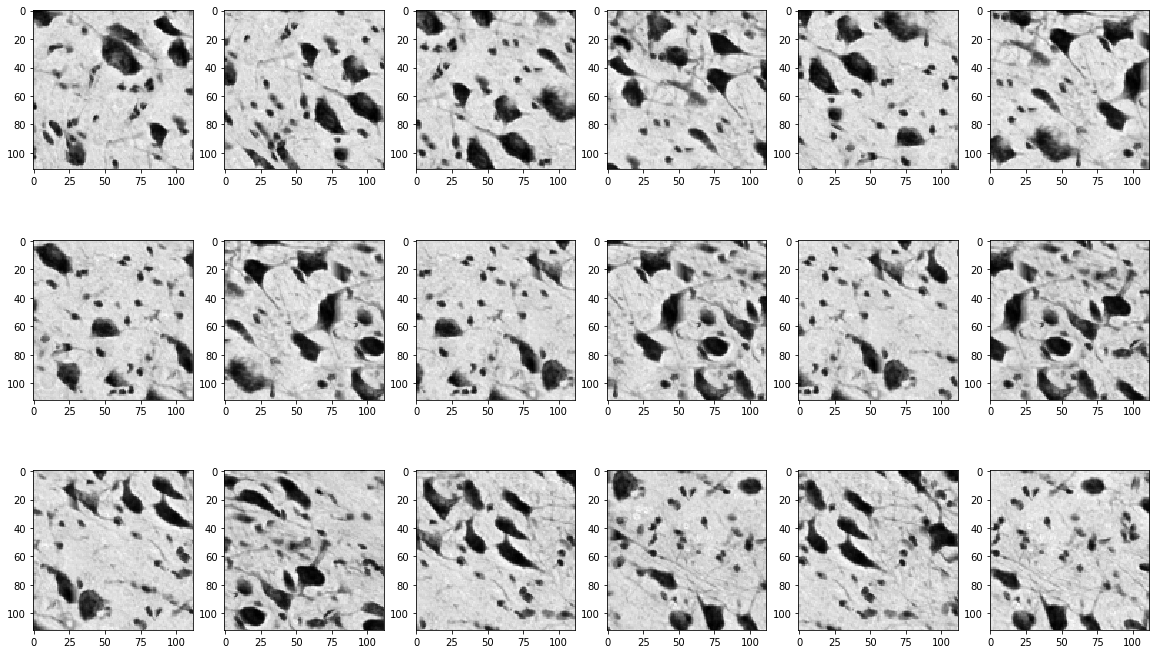

In [63]:
raw_img_fp = '/home/alexn/Downloads/MD585-IHC34-2015.07.16-16.38.23_MD585_2_0101_prep2_lossless.tif'
# Slice index has 1-1 correspondance with slice name. This should be retrieved from the Slice datajoint table.
#    '190' is associated with the raw_img_fp above
slice_index = '190'
structure = '12N'

# Load a raw, prep2 image
img = cv2.imread( raw_img_fp , 2)

# Initialize an empty list that wil be filled with the patches
patches = []

# These offsets are completely necessary for S3 images. Do not change. 
X_OFFSET_PREP2_MD585 = -951
Y_OFFSET_PREP2_MD585 = 446

PATCH_LENGTH = 224 # Patch x and y length in pixels
# PATCH_SEPARATION is unused here, but may be necessary to know for some processing
PATCH_SEPARATION = 56 # Patche starting locations are 56 pixels apart. Consequently they overlap often.

for patch_index in range(len(all_patch_locations[structure][slice_index])):
    x = int( all_patch_locations[structure][slice_index][patch_index][0] )+X_OFFSET_PREP2_MD585
    y = int( all_patch_locations[structure][slice_index][patch_index][1] )+Y_OFFSET_PREP2_MD585
    
    patch = img[ y:y+PATCH_LENGTH, x:x+PATCH_LENGTH ]
    patches.append(patch)

# Plotting 18 figures
fig, ax = plt.subplots(3, 6, figsize=(20,12))
# Displays every 4th patch (up to 4*18=72nd patch), close patches overlap. 
for axis, patch in zip( ax.flatten(), patches[0:72:4]):
    axis.imshow( patch[::2,::2], cmap='gray' )